In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
import re

In [8]:
re.findall("[a-z]", "$34.33 cash.")

['c', 'a', 's', 'h']

In [10]:
re.findall("(name|phone):", "My name: Joe, my phone: (312)555-1212")

['name', 'phone']

In [13]:
re.findall("([Ll]ion)s?", "Give it to the Lions or the lion.")

['Lion', 'lion']

In [14]:
re.sub("[a-z]", "x", "Hey. I know this regex stuff...")

'Hxx. I xxxx xxxx xxxxx xxxxx...'

In [7]:
import nltk
print("gutenberg book ids=", nltk.corpus.gutenberg.fileids())

gutenberg book ids= ['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [9]:
alice = nltk.corpus.gutenberg.words("carroll-alice.txt")
print ("len(alice)=", len(alice))
print(alice[:100])


len(alice)= 34110
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', ',', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', ',', "'", 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', ",'", 'thought', 'Alice', "'", 'without', 'pictures', 'or', 'conversation', "?'", 'So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', '(', 'as', 'well', 'as', 'she', 'could', ',']


In [11]:
grail = nltk.corpus.webtext.words("grail.txt")
print("len(grail)=",len(grail))

print(grail[:100])

len(grail)= 16967
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', 'clop', 'clop', ']', 'KING', 'ARTHUR', ':', 'Whoa', 'there', '!', '[', 'clop', 'clop', 'clop', ']', 'SOLDIER', '#', '1', ':', 'Halt', '!', 'Who', 'goes', 'there', '?', 'ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.', 'King', 'of', 'the', 'Britons', ',', 'defeator', 'of', 'the', 'Saxons', ',', 'sovereign', 'of', 'all', 'England', '!', 'SOLDIER', '#', '1', ':', 'Pull', 'the', 'other', 'one', '!', 'ARTHUR', ':', 'I', 'am', ',', '...', 'and', 'this', 'is', 'my', 'trusty', 'servant', 'Patsy', '.', 'We', 'have', 'ridden', 'the', 'length', 'and', 'breadth', 'of', 'the', 'land', 'in']


In [20]:
#Plain text extraction
def tokenize(str, dict):
    s = 0
    words = []
    
    while (s < len(str)):
        found = False
        
        #find biggest word in dict that mathces str[s:xxx]
        for word in dict:
            lw = len(word)
            if (str[s:s+lw] == word):
                words.append(word)
                s += lw
                found = True
                break
        if (not found):
            words.append(str[s])
            s += 1
                
    print(words)
    #return words
        
# small dictionary of known words, longest words first
dict = ["before", "table", "theta", "after", "where", "there", "bled", "said", "lead", "man", "her", "own", "the", "ran", "it"]

# this algorithm is designed to work with languages that don't have whitspace hcarcters
# so simulate that in our test
tokenize("themanranafterit", dict)    #works!
tokenize("thetabledownthere", dict)  #fails!

['the', 'man', 'ran', 'after', 'it']
['theta', 'bled', 'own', 'there']


In [21]:
#NLTK example: WORD segementation

nltk.word_tokenize("the man, he ran after it's $3.23 dog on 03/23/2016.")

['the',
 'man',
 ',',
 'he',
 'ran',
 'after',
 'it',
 "'s",
 '$',
 '3.23',
 'dog',
 'on',
 '03/23/2016',
 '.']

In [22]:
nltk.sent_tokenize("the man ran after it. The table down there? Yes, down there!" )

['the man ran after it.', 'The table down there?', 'Yes, down there!']

In [25]:
#Stopwords removal

stoppers = "a is of the this". split()

def removeStopWords(stopwords, txt):
    newtxt = ' '.join([word for word in txt.split() if word not in stopwords])
    return newtxt
removeStopWords(stoppers, "this is a test of the stop word removal code")

'test stop word removal code'

In [27]:
#NLTK example: removing stopwords
from nltk.corpus import stopwords
stops = stopwords.words("English")

print("len(stops)=", len(stops))

removeStopWords(stops, "this is a test of the stop word removal code.")

len(stops)= 179


'test stop word removal code.'

In [28]:
#case removal
str = "The man ran after it. The table down there? Yes, down there!"
str.lower()

'the man ran after it. the table down there? yes, down there!'

In [34]:
#stemming
#NLTK example: stemming

def stem_with_porter(words):
    porter = nltk.PorterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

def stem_with_lancaster(words):
    porter = nltk.LancasterStemmer()
    new_words = [porter.stem(w) for w in words]
    return new_words

str = "Please don't ubnuckle your seat-belt while I am driving. he said"

print ("porter:", stem_with_porter(str.split()))
print()
print ("lancaster:", stem_with_lancaster(str.split()))

porter: ['pleas', "don't", 'ubnuckl', 'your', 'seat-belt', 'while', 'I', 'am', 'driving.', 'he', 'said']

lancaster: ['pleas', "don't", 'ubnuckl', 'yo', 'seat-belt', 'whil', 'i', 'am', 'driving.', 'he', 'said']


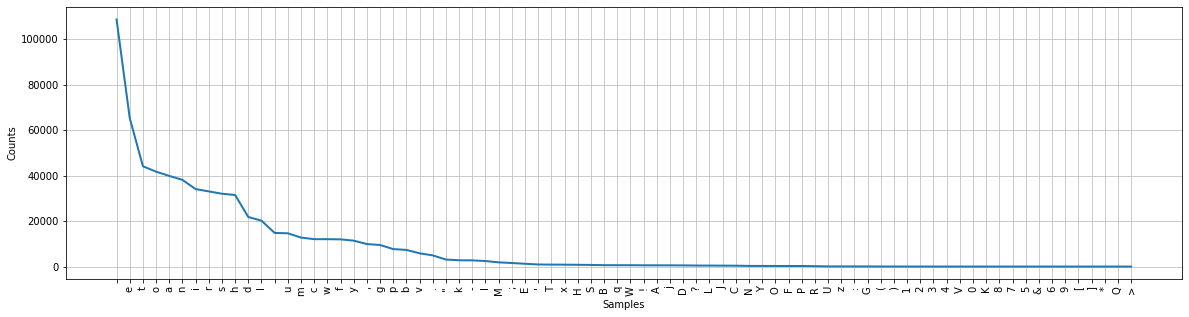

In [5]:
#text exploration
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

#get raw text from "Sense and Sensibility" by Jane Austen
raw = gutenberg.raw("austen-sense.txt")
fd_letters = FreqDist(raw)

words = gutenberg.words("austen-sense.txt")
fd_words = FreqDist(words)
sas = nltk.Text(words)

#these 2 lines let us size the freq dist plot
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

#frequency plt for letters from SAS
fd_letters.plot(100)

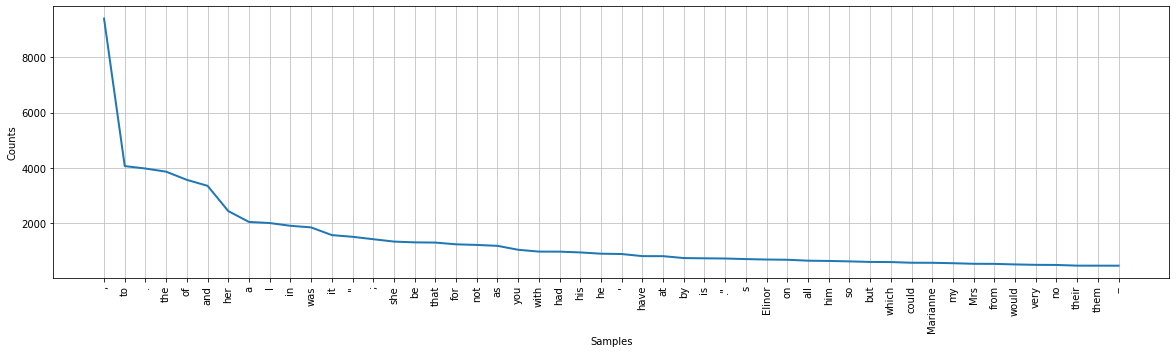

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))

# frequency plot for words from SAS
fd_words.plot(50)

In [14]:
#collocation 
sas.collocation_list()

['Colonel Brandon',
 'Sir John',
 'Lady Middleton',
 'Miss Dashwood',
 'every thing',
 'thousand pounds',
 'dare say',
 'Miss Steeles',
 'said Elinor',
 'Miss Steele',
 'every body',
 'John Dashwood',
 'great deal',
 'Harley Street',
 'Berkeley Street',
 'Miss Dashwoods',
 'young man',
 'Combe Magna',
 'every day',
 'next morning']

In [16]:
#long words
longWords = [w for w in set(words) if len(w)>13]
longWords[:15]

['disrespectfully',
 'conscientiously',
 'misapprehension',
 'aggrandizement',
 'discrimination',
 'unobtrusiveness',
 'reasonableness',
 'misconstruction',
 'unacknowledged',
 'representation',
 'thoughtfulness',
 'inconsiderable',
 'irreconcilable',
 'insignificance',
 'recommendation']

In [17]:
#concordence words

In [18]:
sas.concordance("affectionately")
print()

sas.concordance("correspondence")
print()

sas.concordance("dare")
print()

Displaying 2 of 2 matches:
before . She took them all most affectionately by the hand , and expressed gre
ed , took her hand , kissed her affectionately several times , and then gave w

Displaying 4 of 4 matches:
ould not be maintained if their correspondence were to pass through Sir John '
ve been Edward ' s gift ; but a correspondence between them by letter , could 
she had no doubt , and of their correspondence she was not astonished to hear 
e of Edward afforded her by the correspondence , for his name was not even men

Displaying 25 of 36 matches:
 not know what he was talking of , I dare say ; ten to one but he was light - 
l . The assistance he thought of , I dare say , was only such as might be reas
g , if I have plenty of money , as I dare say I shall , we may think about bui
, you will make conquests enough , I dare say , one way or other . Poor Brando
e . He is the curate of the parish I dare say ." " No , THAT he is not . He is
m . He was afraid of catching cold I dare say 

In [19]:
sas.similar("affection")

attention time regard mother love heart opinion sister wishes wife
arrival marianne kindness family it marriage sisters sake conduct mind


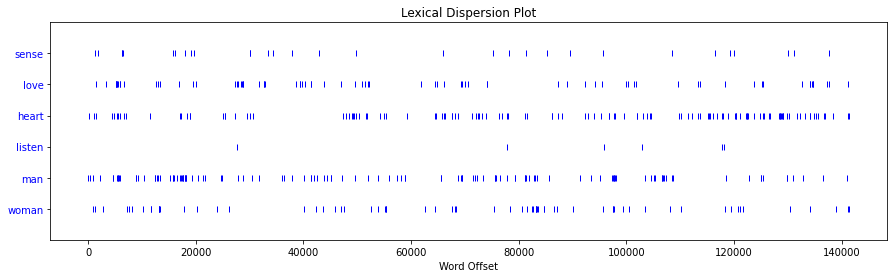

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))

#look at words as they appear over time in the book
sas.dispersion_plot(["sense", "love", "heart", "listen", "man", "woman"])